In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('testing (cardivasucular disease)',sep=';',index_col=0)
#my data is sperated by ; so putting sep as ;

In [4]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
988,22469,1,155,69.0,130,80,2,2,0,0,1,0
989,14648,1,163,71.0,110,70,1,1,0,0,1,1
990,21901,1,165,70.0,120,80,1,1,0,0,1,0
991,14549,2,165,85.0,120,80,1,1,1,1,1,0
992,23393,1,155,62.0,120,80,1,1,0,0,1,0


# eda

In [5]:
df.isnull().sum()
#no null values present

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
df.shape

(69301, 12)

In [7]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


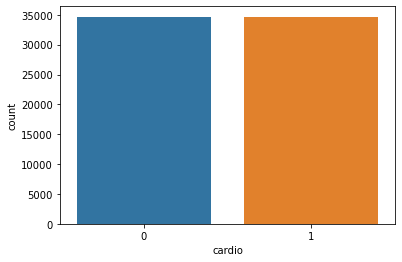

In [8]:

sns.countplot(x='cardio', data=df);
#1, when the patient has cardiovascular disease, and it's 0, when the patient is healthy
#almost equal data of both the classes

In [9]:
df['cardio'].value_counts()

0    34679
1    34622
Name: cardio, dtype: int64

In [10]:
df.groupby(by=['gender', 'cardio'])['cardio'].count()

gender  cardio
1       0         22700
        1         22379
2       0         11979
        1         12243
Name: cardio, dtype: int64

In [179]:
df.dtypes

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo          float64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

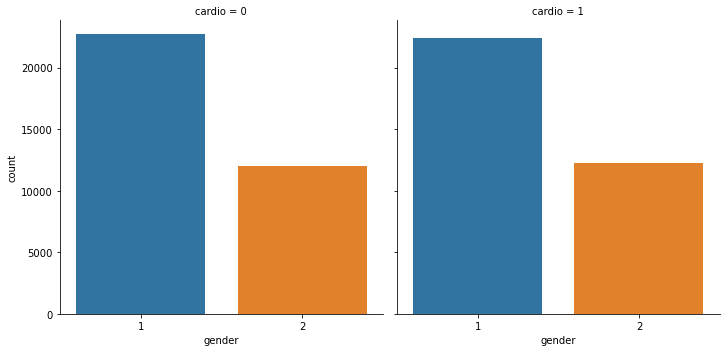

In [11]:
sns.catplot(x='gender', col='cardio', kind='count', data=df)
#more male data than female

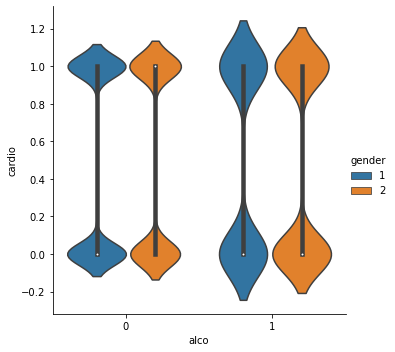

In [13]:
g=sns.catplot(x="alco",y="cardio",hue="gender",data=df,kind="violin")
plt.show()
#we can clearly see men consume more alcohol than women whereas no as such clear relation with cardio presence or absence is visibile 

In [14]:
df.groupby(by=['alco', 'gender'])['gender'].count()

alco  gender
0     1         43926
      2         21641
1     1          1153
      2          2581
Name: gender, dtype: int64

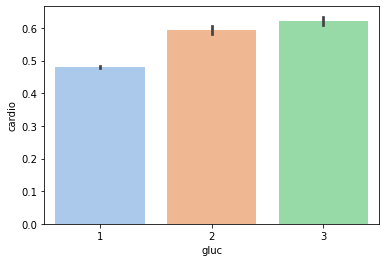

In [15]:
sns.barplot(x='gluc',y='cardio',data=df,palette='pastel')
#from looking at the first 10 rows 
# 0 ABSENCE OF CARDIO 1 PRESENCE OF CARDIO when glucose levels tend to be beyond normal chances of  presence of cardiovascular disease increases 

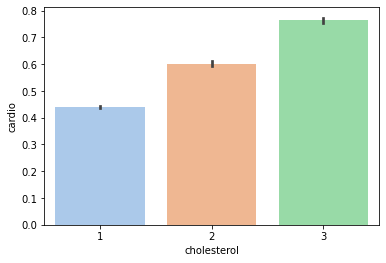

In [119]:
sns.barplot(x='cholesterol',y='cardio',data=df,palette='pastel')
#same is the case with cholesterol

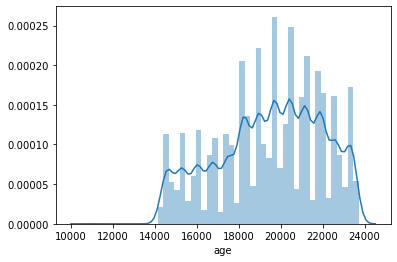

In [16]:
sns.distplot(df['age'])
#max age lies between 18000 days to 24000 days that is 49 to 65 years

{'bodies': [<matplotlib.collections.PolyCollection at 0x259fb4f0a88>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x259fb4f0848>,
 'cmins': <matplotlib.collections.LineCollection at 0x259fb4f0d88>,
 'cbars': <matplotlib.collections.LineCollection at 0x259fb3288c8>}

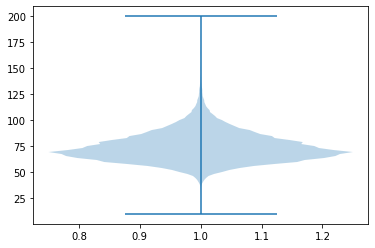

In [17]:
plt.violinplot(df['weight'])#most of the persons have weight from 60 to 85 overall (ranges from 50 kg to 125kg)

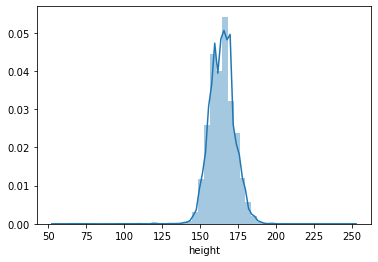

In [18]:
sns.distplot(df['height'])# 160 to 175 (overall 140 to 190cm)

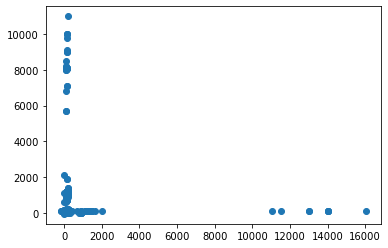

In [19]:
plt.scatter(df['ap_hi'],df['ap_lo'])
#top number shows ap_hi systolic blood pressure(both these variables are correlated and a less cattered from each other)

In [110]:
df1=df.copy() 

In [111]:
df1['years'] = ( df1['age'] / 365).round(0)#lets convert days into years and do some predictions 
#for this purpose i made a new dataframe called df1 by copying df to df1

In [112]:
df1.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
id,,,,,,,,,,,,,
988,22469,1,155,69.0,130,96.650092,2,2,0,0,1,0,62.0
989,14648,1,163,71.0,110,96.650092,1,1,0,0,1,1,40.0
990,21901,1,165,70.0,120,96.650092,1,1,0,0,1,0,60.0
991,14549,2,165,85.0,120,96.650092,1,1,1,1,1,0,40.0
992,23393,1,155,62.0,120,96.650092,1,1,0,0,1,0,64.0


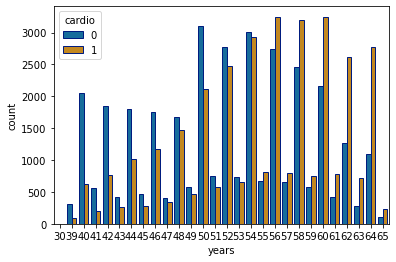

In [117]:
df1["years"] = pd.to_numeric(df1["years"],downcast='integer') # Convert years to an integer

sns.countplot(x='years', hue='cardio', data = df1, palette="colorblind", edgecolor=sns.color_palette("dark", n_colors = 1));
#presence of cardiovascular disease is there with increase in age 

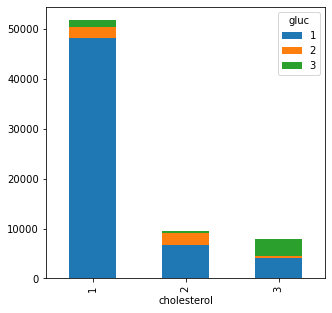

In [124]:
df.groupby(["cholesterol", "gluc"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))
#so we can see  cholesterol and gluc goes hand in hand when the glucose level is normal so is the cholesterol normal to a large extent and vice versa

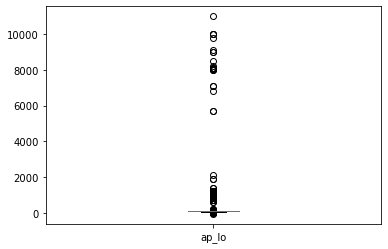

In [22]:
df['ap_lo'].plot.box()

In [23]:
import numpy as np

In [108]:
df.loc[df['ap_lo']>120,'ap_lo']=np.mean(df['ap_lo'])

In [ ]:
#as i can see outliers(values like 1100,8000) present in my dataset like for ap_lo almost the dataset ranges between 60 to 120 so treating the values above 120 as outliers and removing them

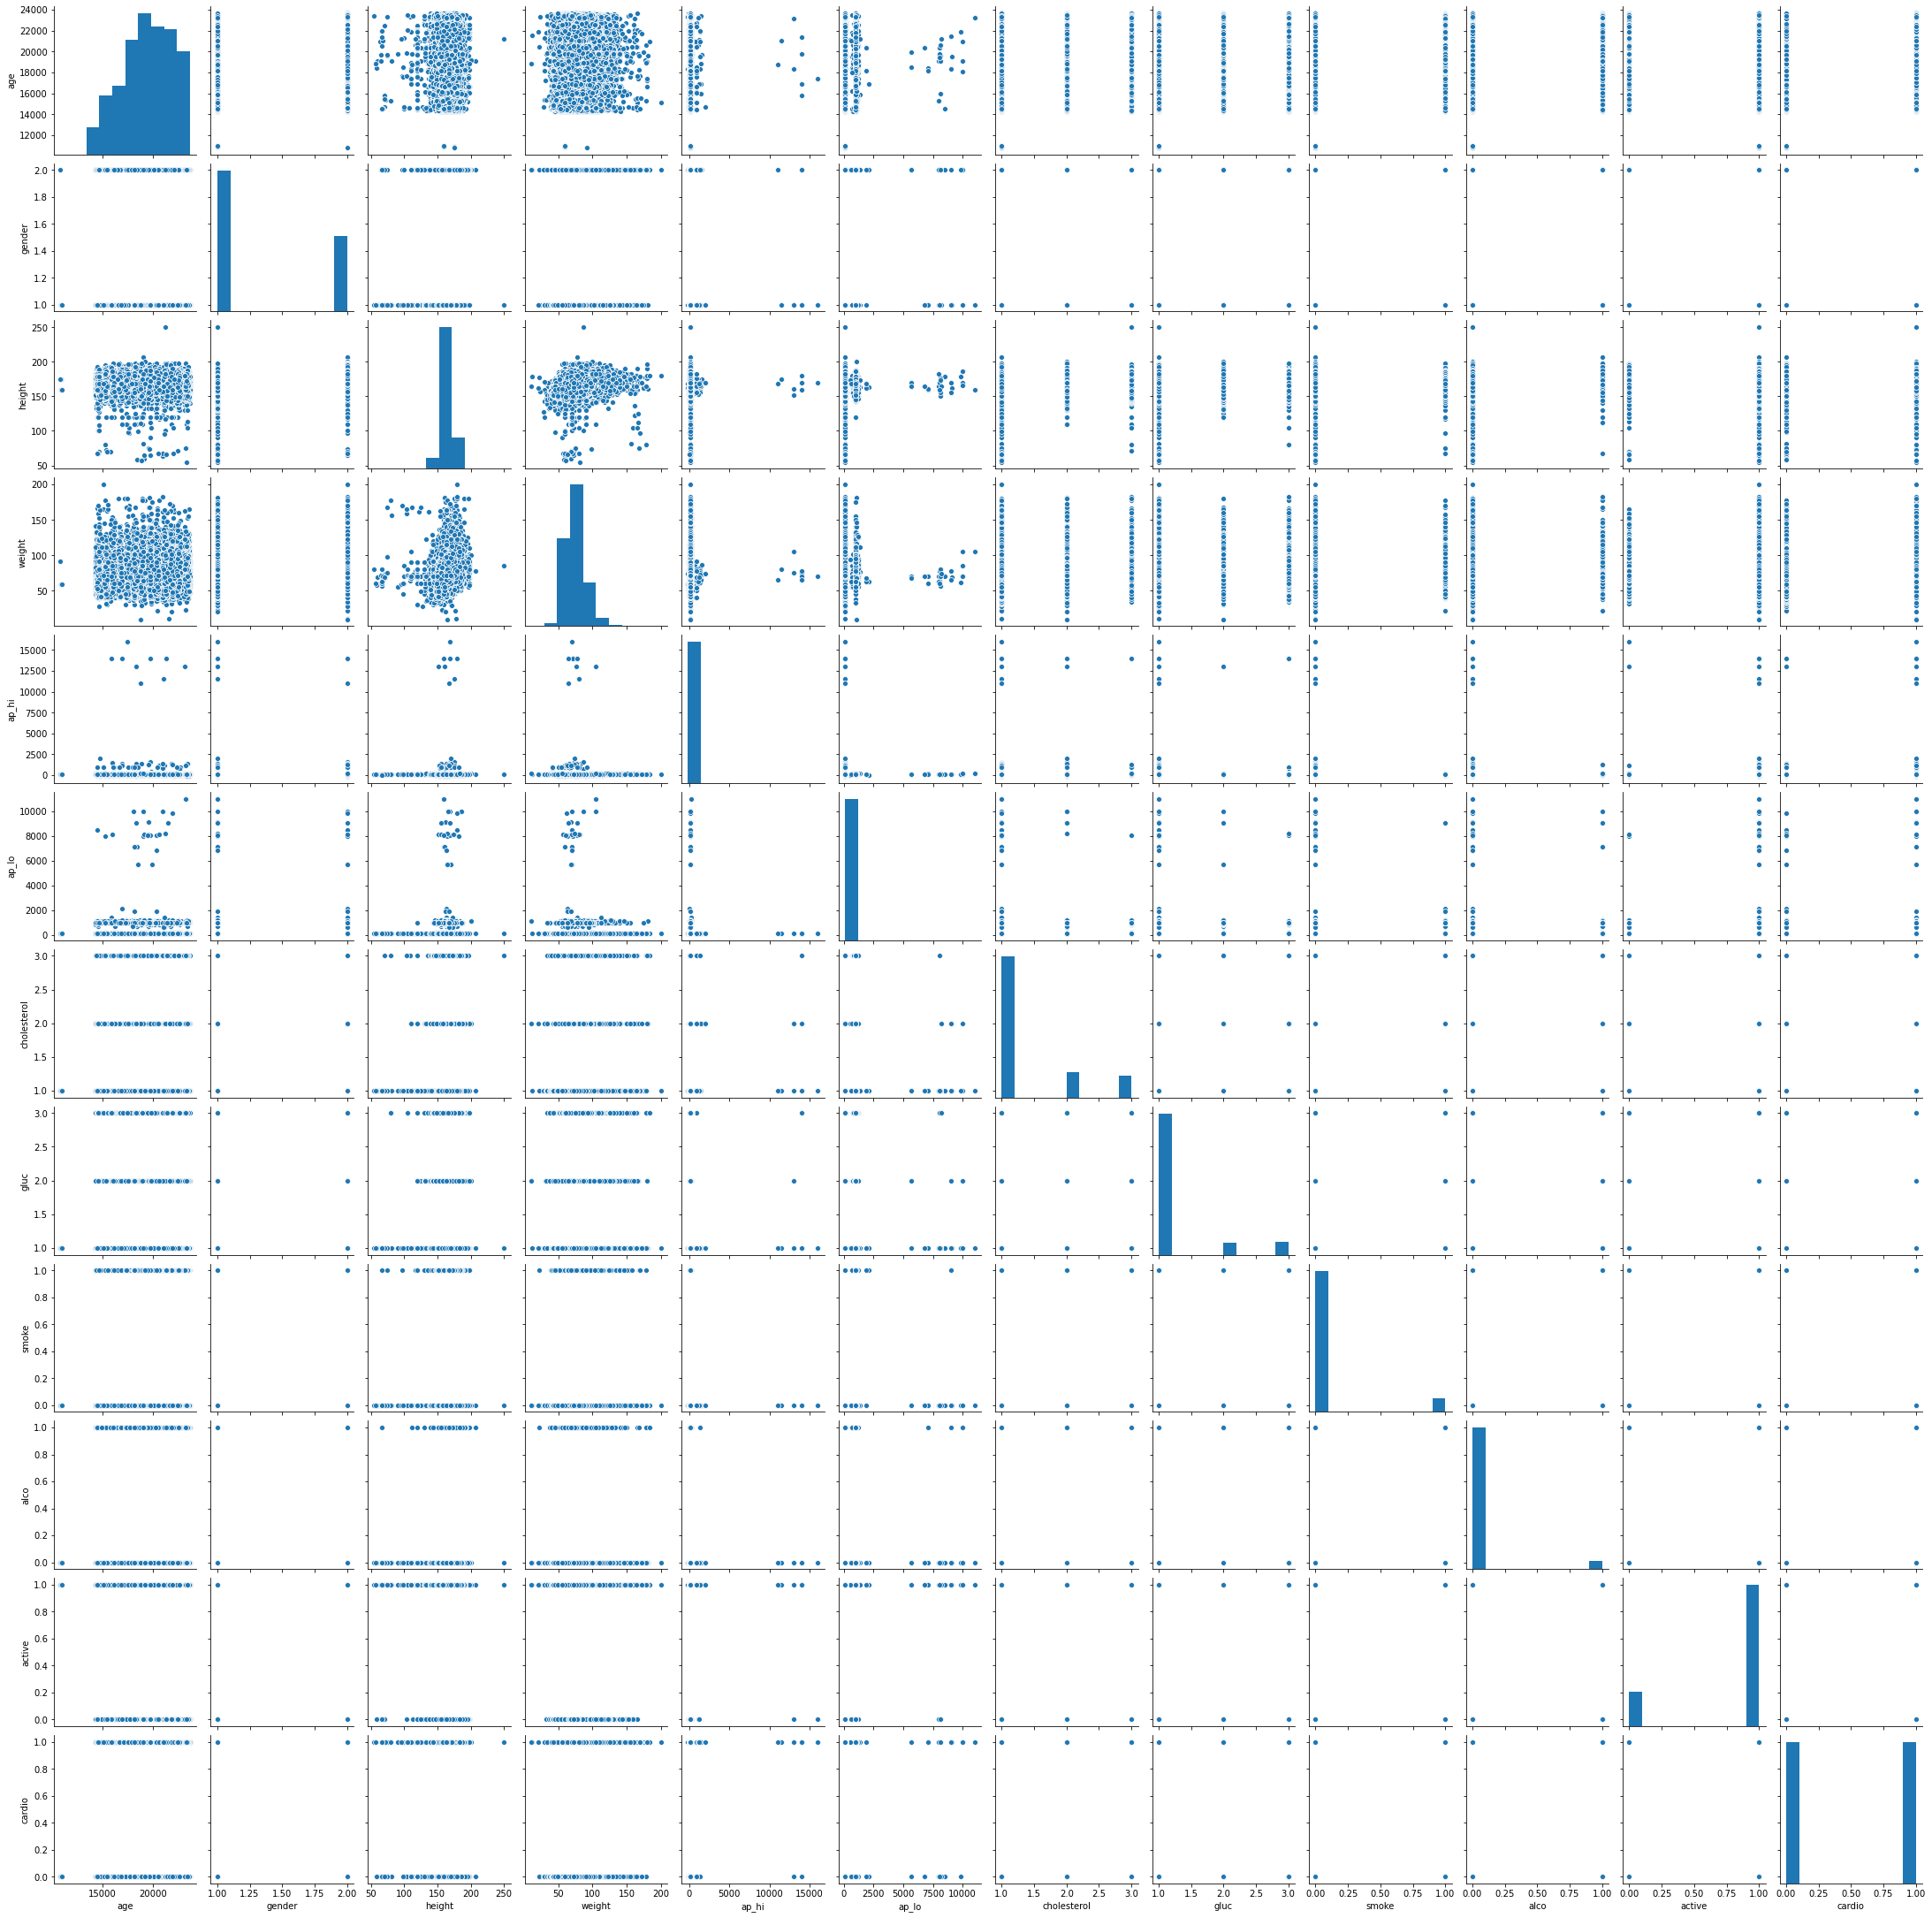

In [30]:
sns.pairplot(df)

In [31]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.023150,-0.081304,0.054409,0.020663,0.009955,0.154343,0.099095,-0.047680,-0.029435,-0.009926,0.238095
gender,-0.023150,1.000000,0.499373,0.155649,0.005980,0.012081,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592
height,-0.081304,0.499373,1.000000,0.290333,0.005492,0.004407,-0.050632,-0.018929,0.187899,0.094164,-0.005974,-0.011015
weight,0.054409,0.155649,0.290333,1.000000,0.030665,0.031209,0.141901,0.107255,0.068304,0.067259,-0.016514,0.182094
ap_hi,0.020663,0.005980,0.005492,0.030665,1.000000,0.012178,0.023573,0.011821,-0.000933,0.001385,0.000032,0.054211
ap_lo,0.009955,0.012081,0.004407,0.031209,0.012178,1.000000,0.016178,0.007171,0.003628,0.008894,0.005014,0.048429
cholesterol,0.154343,-0.036335,-0.050632,0.141901,0.023573,0.016178,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.099095,-0.021154,-0.018929,0.107255,0.011821,0.007171,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062
smoke,-0.047680,0.337608,0.187899,0.068304,-0.000933,0.003628,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225
alco,-0.029435,0.171015,0.094164,0.067259,0.001385,0.008894,0.036015,0.011442,0.339709,1.000000,0.025745,-0.007217


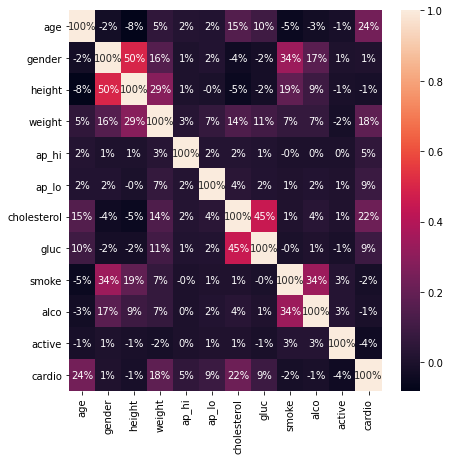

In [118]:
plt.figure(figsize=(7,7))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')
#the most correlated features are age,cholestrol,glucose,ap_hi,ap_lo,weight.

In [33]:
x=df.iloc[:,0:-1]


y=df.iloc[:,-1]

print(x.shape)
print(y.shape)

(69301, 11)
(69301,)


In [34]:
x.shape

(69301, 11)

In [35]:
#normalisation 
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [36]:
x

array([[ 1.21601824, -0.73302344, -1.14099939, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [-1.95391548, -0.73302344, -0.16601717, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [ 0.98580185, -0.73302344,  0.07772839, ..., -0.31072844,
        -0.23864069,  0.49376463],
       ...,
       [-0.16325352,  1.36421285,  2.27143838, ..., -0.31072844,
         4.19040018, -2.02525646],
       [ 1.20061644, -0.73302344, -0.16601717, ..., -0.31072844,
        -0.23864069, -2.02525646],
       [ 0.43417421, -0.73302344,  0.68709227, ..., -0.31072844,
        -0.23864069,  0.49376463]])

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')

In [38]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.22,random_state=52)

# logistic regression

In [39]:
lg=LogisticRegression()

In [40]:
lg.fit(train_x,train_y)

LogisticRegression()

In [41]:
pred=lg.predict(test_x)
print(pred)

[0 0 1 ... 1 0 0]


In [42]:
print("accuracy_score:",accuracy_score(test_y,pred))

accuracy_score: 0.7179117203384272


In [43]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      7647
           1       0.74      0.68      0.71      7600

    accuracy                           0.72     15247
   macro avg       0.72      0.72      0.72     15247
weighted avg       0.72      0.72      0.72     15247



In [44]:
lg.score(train_x,train_y)

0.7194287194287194

In [45]:
lg.score(test_x,test_y)

0.7179117203384272

In [46]:
print(confusion_matrix(test_y,pred))

[[5805 1842]
 [2459 5141]]


# logistic regression using grid search cv hypertuning

In [129]:
dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter)

In [131]:
import time

lg = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lm, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(x, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.719340 using {'dual': False, 'max_iter': 100}
Execution time: 1.5678541660308838 ms


In [138]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(train_x,train_y)

GaussianNB()

In [145]:
predgnb=gnb.predict(test_x)
gnb_conf_matrix = confusion_matrix(test_y,predgnb)
print(accuracy_score(predgnb,test_y))
print(gnb_conf_matrix)

0.5875254148357054
[[6742  905]
 [5384 2216]]


# decision tree classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dct=DecisionTreeClassifier()
dct.fit(train_x,train_y)
preddct=dct.predict(test_x)

In [49]:
print(classification_report(test_y,preddct))

              precision    recall  f1-score   support

           0       0.63      0.62      0.63      7647
           1       0.63      0.63      0.63      7600

    accuracy                           0.63     15247
   macro avg       0.63      0.63      0.63     15247
weighted avg       0.63      0.63      0.63     15247



# grid search cv for decision tree classifier

In [73]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score
depth_range = range(1, 10)
leaf_range = range(1,15)
param_grid = dict(max_depth=depth_range, min_samples_leaf=leaf_range)
dct = DecisionTreeClassifier()
grid = GridSearchCV(dct, param_grid, cv=10, scoring='accuracy')
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)
print (grid.best_estimator_)

0.7309707770867776
{'max_depth': 7, 'min_samples_leaf': 14}
DecisionTreeClassifier(max_depth=7, min_samples_leaf=14)


# grid search cv for random forest classifier

In [99]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
Cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
Cv_rf.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [104]:
Cv_rf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

In [105]:

print(Cv_rf.best_score_)

0.7334147073795313


# random forest classifier without hypertuning

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_x, train_y)
rf_predict=rf.predict(test_x) 

In [51]:
rf_conf_matrix = confusion_matrix(test_y, rf_predict)
rf_acc_score = accuracy_score(test_y, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score)

[[5448 2199]
 [2262 5338]]
0.7074178526923329


In [ ]:
#with hypertuning we can acheive accuracy from 71 to 73

# ada boost classifier

In [52]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=7)
ad.fit(train_x,train_y)
ad_pred=ad.predict(test_x)
print(accuracy_score(test_y,ad_pred))
print(confusion_matrix(test_y,ad_pred))
print(classification_report(test_y,ad_pred))

0.7218469207057125
[[5966 1681]
 [2560 5040]]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      7647
           1       0.75      0.66      0.70      7600

    accuracy                           0.72     15247
   macro avg       0.72      0.72      0.72     15247
weighted avg       0.72      0.72      0.72     15247



# knn with grid search cv

In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#define the model and parameters
knn = KNeighborsClassifier()

parameters = {'n_neighbors':[4,5,6,7],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}

#Fit the model
model = GridSearchCV(knn, param_grid=parameters)
model.fit(train_x,train_y)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5], 'n_jobs': [-1],
                         'n_neighbors': [4, 5, 6, 7]})

In [127]:
model.best_params_

{'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 7}

In [128]:
model.best_score_

0.6483701229030527

In [ ]:
#knn does not perform well even with grid search cv

# support vector classifier

In [180]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf")
svc.fit(train_x,train_y)
svc.score(test_x,test_y)

0.7254541877090576

# GradientBoostingClassifier with hypertuning learning rates (1 tend to be the best learning rate for my model with 73 accuracy)

In [132]:
from sklearn.ensemble import GradientBoostingClassifier

In [137]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1,1.25,1.75]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(train_x,train_y)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(train_x,train_y)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(test_x,test_y)))
    print()
    #after a learning rate of 1 my accuracy tends to decrease so 1 is the best learning rate with 73 accuracy

Learning rate:  0.05
Accuracy score (training): 0.724
Accuracy score (validation): 0.722

Learning rate:  0.1
Accuracy score (training): 0.726
Accuracy score (validation): 0.724

Learning rate:  0.25
Accuracy score (training): 0.727
Accuracy score (validation): 0.727

Learning rate:  0.5
Accuracy score (training): 0.729
Accuracy score (validation): 0.730

Learning rate:  0.75
Accuracy score (training): 0.729
Accuracy score (validation): 0.731

Learning rate:  1
Accuracy score (training): 0.732
Accuracy score (validation): 0.731

Learning rate:  1.25
Accuracy score (training): 0.730
Accuracy score (validation): 0.728

Learning rate:  1.75
Accuracy score (training): 0.721
Accuracy score (validation): 0.720



# auc

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
lm = LogisticRegression()
lm.fit(train_x,train_y)
lm_predict = lm.predict(test_x)

In [157]:
y_pred_prob=lm.predict_proba(test_x)[:,1]

In [158]:
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)

In [159]:
fpr

array([0.0000000e+00, 0.0000000e+00, 3.9231071e-04, ..., 9.9973846e-01,
       1.0000000e+00, 1.0000000e+00])

In [160]:
tpr

array([0.00000000e+00, 1.31578947e-04, 1.31578947e-04, ...,
       9.99868421e-01, 9.99868421e-01, 1.00000000e+00])

In [161]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.97672140e-01, ...,
       6.72923016e-03, 2.15025191e-04, 7.65469235e-05])

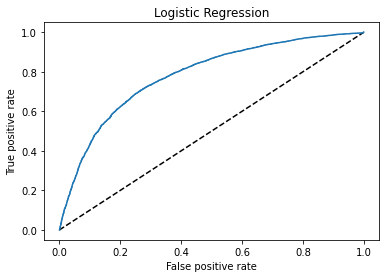

In [162]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [164]:
auc_score=roc_auc_score(test_y,lm.predict(test_x))

In [165]:
auc_score

0.7177842962152341

In [167]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_x, train_y)
rf_predict=rf.predict(test_x) 

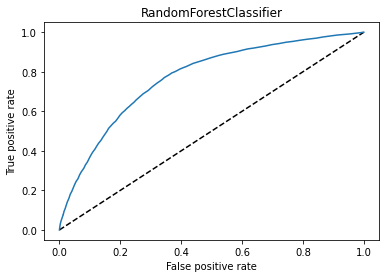

In [168]:
y_pred_prob=rf.predict_proba(test_x)[:,0]
tpr,fpr,thresholds=roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

In [169]:
auc_score=roc_auc_score(test_y,rf.predict(test_x))

In [170]:
auc_score

0.7081821044372406

In [ ]:
#our model accuracy is 0.70 in logistic regression,random forest classifier,decision tree classifier also auc score 0.70 
#in these cases with hypertuning we can acheive 73 accuracy too knn and gnb doesent give such good results

In [173]:
pip install joblib

In [178]:
#saving the best model and best score random forest classifier
import jobliblib
joblib.dump(Cv_rf.best_score_,'Cv_rf.best_score_cardio.obj')
rf_from_joblib=joblib.load('Cv_rf.best_score_cardio.obj')